<a href="https://colab.research.google.com/github/denisakatov/Natural-language-processing/blob/main/hw_lesson_2_nature_lang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 1
### Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно. Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.Исключим стоп-слова с помощью stop_words='english'.Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pickle


In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/Обработка естественного языка/1/combine_df.pickle', 'rb') as f:
     data = pickle.load(f)

In [5]:
data.shape

(49159, 7)

In [6]:
data.head(2)

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, can, use, cause, t...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."


In [7]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [8]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
count_vectorizer = CountVectorizer(
    ngram_range=(1, 1), 
    max_df=0.9, 
    max_features = 1000, 
    stop_words='english', 
    analyzer='word', 
    binary=True,)

tweet_stemmed

### We have to add sentences in list. We can use two ways. first is with cycle

In [11]:
tweet_stemmed1 = []
for i in data.tweet_stemmed:
  tweet_stemmed1.append(' '.join(i))

%time


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.44 µs


## Second way is apply and lambda

In [12]:
tweet_stemmed = data['tweet_stemmed'].apply(lambda x: ' '.join(x))
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.63 µs


It is strange but using cycle "for" is faster than lambda with apply

In [13]:
print(f'with apply and lambda: {tweet_stemmed1[:2]}'), print(f'with cycle for: {tweet_stemmed1[:2]}')

with apply and lambda: ['father dysfunct selfish drag kid dysfunct run', 'thank lyft credit use caus offer wheelchair van pdx disapoint getthank']
with cycle for: ['father dysfunct selfish drag kid dysfunct run', 'thank lyft credit use caus offer wheelchair van pdx disapoint getthank']


(None, None)

In [14]:
bag_of_words = count_vectorizer.fit_transform(tweet_stemmed1)
# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)



,abl,absolut,accept,account,act,action,activ,actor,actual,ad,adapt,add,adventur,affirm,afternoon,age,ago,agre,ahead,aist,album,aliv,allahsoil,allow,alon,alreadi,altwaystoh,alway,amaz,america,american,amp,angel,anger,angri,anim,anniversari,announc,anoth,answer,...,welcom,went,wet,whatev,white,wife,wild,win,wine,winner,wish,woh,woman,women,wonder,word,work,workout,world,worri,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,ye,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's check that the first sentence contains 'father'

In [15]:
print(pd.DataFrame(bag_of_words.toarray(), columns = feature_names).head(10).loc[:,'father'])

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: father, dtype: int64


For check reason let's count col account

In [16]:
np.sum(pd.DataFrame(bag_of_words.toarray(), columns = feature_names).loc[:,'account'])

95

tweet_lemmatized

In [17]:
tweet_lemmatized = []
for i in data.tweet_lemmatized:
  tweet_lemmatized.append(' '.join(i))

In [18]:
bag_of_words = count_vectorizer.fit_transform(tweet_lemmatized)
# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names).head(2)



,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,affirmation,afternoon,age,ago,agree,ahead,aist,album,alive,allahsoil,altwaystoheal,amazing,america,american,amp,angel,anger,angry,animal,anniversary,anti,anxiety,anymore,app,apple,arrived,ask,attack,august,available,...,went,wet,white,wife,wild,win,wine,winner,wish,wishing,woh,woman,wonder,wonderful,word,work,working,workout,world,worry,worst,wow,writing,wrong,wtf,xx,xxx,ya,yay,yeah,year,yes,yesterday,yo,yoga,york,young,youtube,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Task 2
### Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно. Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df. Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000. Исключим стоп-слова с помощью stop_words='english'. Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.9, 
    max_features = 1000, 
    stop_words='english',
)
values = tfidf_vectorizer.fit_transform(tweet_lemmatized)
# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(values.toarray(), columns = feature_names).head(2)

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,affirmation,afternoon,age,ago,agree,ahead,aist,album,alive,allahsoil,altwaystoheal,amazing,america,american,amp,anger,angry,animal,anniversary,anti,anxiety,anymore,app,apple,arrived,ask,attack,august,available,award,...,wet,white,wife,wild,win,wine,winner,wisdom,wish,wishing,woh,woman,wonder,wonderful,word,work,working,workout,world,worry,worst,wow,writing,wrong,wtf,xx,xxx,ya,yay,yeah,year,yes,yesterday,yo,yoga,york,young,youtube,yr,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
bag_of_words = count_vectorizer.fit_transform(tweet_stemmed)
# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names).head(2)



,abl,absolut,accept,account,act,action,activ,actor,actual,ad,adapt,add,adventur,affirm,afternoon,age,ago,agre,ahead,aist,album,aliv,allahsoil,allow,alon,alreadi,altwaystoh,alway,amaz,america,american,amp,angel,anger,angri,anim,anniversari,announc,anoth,answer,...,welcom,went,wet,whatev,white,wife,wild,win,wine,winner,wish,woh,woman,women,wonder,word,work,workout,world,worri,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,ye,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Task 3
### Создайте мешок слов с помощью sklearn.feature_extraction.text.HashingVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.


In [22]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(n_features=2**4)
values = vectorizer.fit_transform(tweet_stemmed)
print(values.shape)
print(values.toarray())

(49159, 16)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.33333333  0.         ...  0.          0.33333333
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.34299717 -0.17149859  0.         ...  0.         -0.17149859
   0.17149859]
 [ 0.          0.5547002   0.         ... -0.2773501   0.
   0.2773501 ]
 [-0.4472136   0.          0.         ... -0.4472136   0.4472136
   0.        ]]


In [23]:
vectorizer = HashingVectorizer(n_features=2**4)
values = vectorizer.fit_transform(tweet_lemmatized)
print(values.shape)
print(values.toarray())

(49159, 16)
[[ 0.          0.          0.         ...  0.57735027  0.
   0.        ]
 [ 0.33333333  0.33333333  0.33333333 ...  0.          0.33333333
  -0.33333333]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.40824829 -0.20412415 -0.20412415 ...  0.         -0.20412415
   0.        ]
 [ 0.          0.60302269 -0.30151134 ...  0.30151134 -0.30151134
   0.30151134]
 [ 0.          0.          0.         ... -0.4472136   0.4472136
   0.        ]]


## Task 4.
### Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы

In [24]:
from sklearn.metrics import accuracy_score

With tweet_stemmed

In [25]:
# Загружаем данные
labels, texts = [], []
try:
  for i, line in enumerate(tweet_stemmed):
      content = line.split()
      labels.append(content[0])
      texts.append(" ".join(content[1:]))
except IndexError:
  pass



# создаем df
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
trainDF.head(5)

,text,label
0,dysfunct selfish drag kid dysfunct run,father
1,lyft credit use caus offer wheelchair van pdx ...,thank
2,majesti,bihday
3,love take time ur,model
4,societi motiv,factsguid


In [26]:
from sklearn import model_selection, preprocessing, linear_model
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

In [27]:
# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)


count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['text'])

xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

classifier = linear_model.LogisticRegression()
classifier.fit(xtrain_count, train_y)
predictions = classifier.predict(xvalid_count)

In [28]:
accuracy_score(valid_y, predictions)

0.002036659877800407

In [29]:
result_tweet_stemmed = {}
features = [i**3 for i in range(1,20)]
for i in features:
    vct = HashingVectorizer(n_features=i)
    vct.fit(tweet_stemmed)

    xtrain_hash =  vct.transform(train_x)
    xvalid_hash =  vct.transform(valid_x)

    classifier = linear_model.LogisticRegression()
    classifier.fit(xtrain_hash, train_y)
    predictions = classifier.predict(xvalid_hash)
    accuracy_score(valid_y, predictions)
    result_tweet_stemmed[i]=accuracy_score(valid_y, predictions)


In [30]:
result_tweet_stemmed

{1: 0.0,
 8: 0.002036659877800407,
 27: 0.002036659877800407,
 64: 0.004073319755600814,
 125: 0.004073319755600814,
 216: 0.004073319755600814,
 343: 0.004073319755600814,
 512: 0.004073319755600814,
 729: 0.004073319755600814,
 1000: 0.004073319755600814,
 1331: 0.004073319755600814,
 1728: 0.004073319755600814,
 2197: 0.004073319755600814,
 2744: 0.004073319755600814,
 3375: 0.004073319755600814,
 4096: 0.004073319755600814,
 4913: 0.004073319755600814,
 5832: 0.004073319755600814,
 6859: 0.004073319755600814}

--------------------------------------------------------------------------

With tweet_lemmatized

In [31]:
# Загружаем данные
labels, texts = [], []
try:
  for i, line in enumerate(tweet_lemmatized):
      content = line.split()
      labels.append(content[0])
      texts.append(" ".join(content[1:]))
except IndexError:
  pass



# создаем df
trainDF1 = pd.DataFrame()
trainDF1['text'] = texts
trainDF1['label'] = labels
trainDF1.head(5)

,text,label
0,dysfunctional selfish drag kid dysfunction run,father
1,lyft credit use cause offer wheelchair van pdx...,thanks
2,majesty,bihday
3,love take time ur,model
4,society motivation,factsguide


In [32]:
from sklearn import model_selection, preprocessing, linear_model
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF1['text'], trainDF1['label'])

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)


count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF1['text'])

xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

classifier = linear_model.LogisticRegression()
classifier.fit(xtrain_count, train_y)
predictions = classifier.predict(xvalid_count)

In [33]:
accuracy_score(valid_y, predictions)

0.004073319755600814

In [34]:
result_tweet_lemmatized = {}
features = [i**3 for i in range(1,20)]
for i in features:
    vct = HashingVectorizer(n_features=i)
    vct.fit(tweet_lemmatized)

    xtrain_hash =  vct.transform(train_x)
    xvalid_hash =  vct.transform(valid_x)

    classifier = linear_model.LogisticRegression()
    classifier.fit(xtrain_hash, train_y)
    predictions = classifier.predict(xvalid_hash)
    accuracy_score(valid_y, predictions)
    result_tweet_lemmatized[i]=accuracy_score(valid_y, predictions)


In [35]:
result_tweet_lemmatized

{1: 0.0,
 8: 0.002036659877800407,
 27: 0.002036659877800407,
 64: 0.002036659877800407,
 125: 0.002036659877800407,
 216: 0.002036659877800407,
 343: 0.004073319755600814,
 512: 0.004073319755600814,
 729: 0.004073319755600814,
 1000: 0.002036659877800407,
 1331: 0.004073319755600814,
 1728: 0.004073319755600814,
 2197: 0.004073319755600814,
 2744: 0.004073319755600814,
 3375: 0.004073319755600814,
 4096: 0.004073319755600814,
 4913: 0.004073319755600814,
 5832: 0.004073319755600814,
 6859: 0.004073319755600814}

In [36]:
import matplotlib.pyplot as plt


In [37]:
i,j = [], []
for k, v in result_tweet_lemmatized.items():
  i.append(k)
  j.append(v)

i1,j1 = [], []
for k1, v1 in result_tweet_stemmed.items():
  i1.append(k1)
  j1.append(v1)


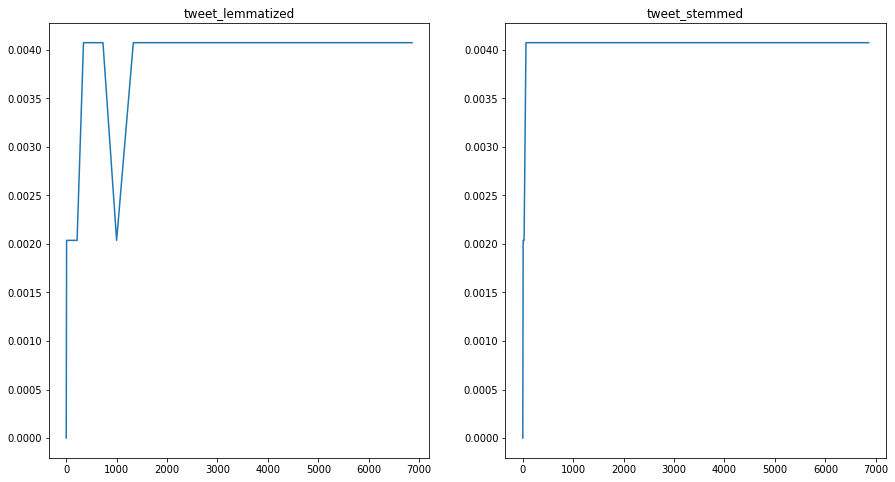

In [38]:
fig, ax = plt.subplots(1,2, figsize = (15,8))
ax[0].plot(i,j)
ax[0].set_title('tweet_lemmatized')
ax[1].plot(i1,j1)
ax[1].set_title('tweet_stemmed')
plt.show()

Судя по графику, результат чуть становится лучше в зависимости от количетства фичей, но результат не очень убедительный.